# Data Collection

In [39]:
import geopandas as gp
import numpy as np
from laspy.file import File
from pandas import DataFrame
from shapely.geometry import Point

In [40]:
# Web source for basemap satellite image
url_lidar = 'https://lidar.jinha.org/download.php?cname=marion&clon=-86.13305839196093&clat=39.779844384833936&years=2011,2016'
url_vacant_and_abandoned_dataset = 'https://data.indy.gov/datasets/abandoned-and-vacant-housing?geometry=-86.313%2C39.748%2C-85.983%2C39.794'

# Local filepaths
abandoned_shapefile_path = 'training_data/abandoned_and_vacant/Abandoned_And_Vacant_Housing.shp'
satellite_las_file_path = './training_data/MC_01951645.las'

In [42]:
# Abandoned building shapefile
gdf_abandoned = gp.read_file(abandoned_shapefile_path)

print(gdf_abandoned.shape)
gdf_abandoned.head()

(7216, 15)


,OBJECTID,PARCEL_I,STNUMBER,PRE_DIR,STREET_NAM,SUFFIX,SUF_DIR,FULL_STNAM,CITY,ZIPCODE,ADDRESS,STATUS,SHAPEAREA,SHAPELEN,geometry
0,345944,1029867,2365,None,ADAMS,ST,None,ADAMS ST,INDIANAPOLIS,46218,2365 ADAMS ST,Abandoned,12801.863622,480.073502,"POLYGON ((-86.10858 39.80163, -86.10858 39.801..."
1,346056,1010458,2755,N,KEYSTONE,AVE,None,KEYSTONE AVE,INDIANAPOLIS,46218,2755 N KEYSTONE AVE,Abandoned,11133.172761,434.607365,"POLYGON ((-86.12098 39.80677, -86.12146 39.806..."
2,346078,1088338,1929,None,HOUSTON,ST,None,HOUSTON ST,INDIANAPOLIS,46218,1929 HOUSTON ST,Abandoned,5400.130625,350.010293,"POLYGON ((-86.10891 39.79337, -86.10891 39.793..."
3,346248,1024949,40,None,EASTERN,AVE,None,EASTERN AVE,INDIANAPOLIS,46201,40 EASTERN AVE,Abandoned,4999.768822,329.991105,"POLYGON ((-86.11771 39.76975, -86.11816 39.769..."
4,346265,1014955,1031,N,TACOMA,AVE,None,TACOMA AVE,INDIANAPOLIS,46201,1031 N TACOMA AVE,Abandoned,6405.338407,436.020670,"POLYGON ((-86.11886 39.78222, -86.11951 39.782..."


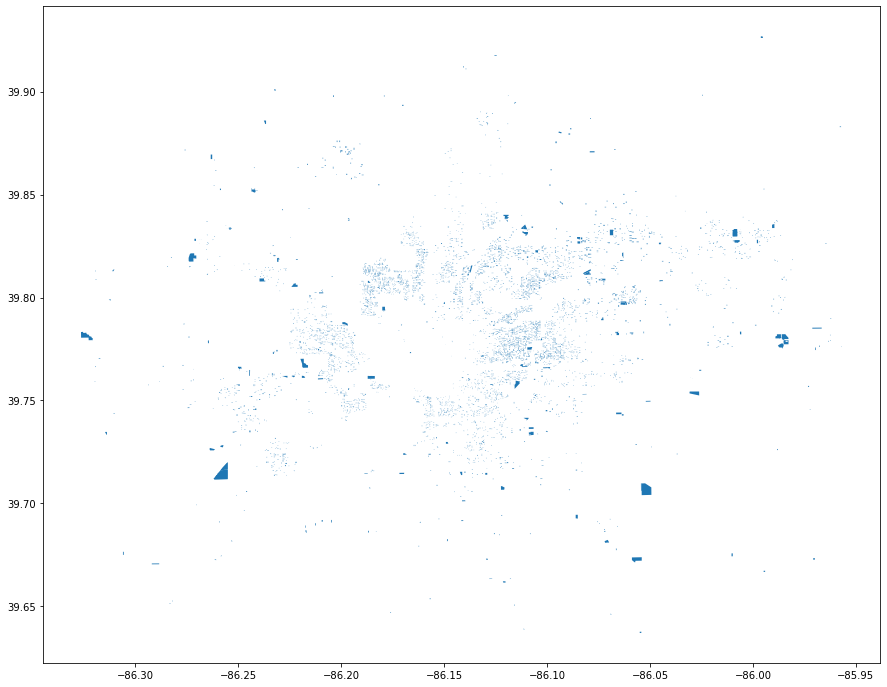

In [43]:
gdf_abandoned.plot(figsize=(15,15));

In [21]:
# Satellite basemap

#Read LAS file
inFile = File(satellite_las_file_path)

#Import LAS into numpy array (X=raw integer value x=scaled float value)
lidar_points = np.array((inFile.x, inFile.y, inFile.z, inFile.intensity,
               inFile.classification, inFile.scan_angle)).transpose()

#Transform to pandas DataFrame
lidar_df=DataFrame(lidar_points)

#Transform to geopandas GeoDataFrame
crs = None
geometry = [Point(xyz) for xyz in zip(inFile.x,inFile.y,inFile.z)]

NameError: name 'GeoDataFrame' is not defined

In [32]:
lidar_geodf = gp.GeoDataFrame(lidar_df, crs=crs, geometry=geometry)
lidar_geodf.rename(columns = {0:'x', 1:'y', 2:'z', 3:'intensity', 4:'classification', 5:'scan_angle'}, inplace=True)

# lidar_geodf.crs = {'init' :'epsg:2959'} # set correct spatial reference

In [44]:
lidar_geodf

,x,y,z,intensity,classification,scan_angle,geometry
0,197999.94,1649996.56,746.20,9216.0,1.0,-2167.0,POINT Z (197999.940 1649996.560 746.200)
1,197996.02,1649999.59,746.45,11264.0,1.0,-2167.0,POINT Z (197996.020 1649999.590 746.450)
2,197996.28,1649996.16,746.24,7424.0,1.0,-2167.0,POINT Z (197996.280 1649996.160 746.240)
3,197996.55,1649992.72,746.15,8704.0,2.0,-2167.0,POINT Z (197996.550 1649992.720 746.150)
4,197997.69,1649997.33,781.17,3584.0,1.0,-2167.0,POINT Z (197997.690 1649997.330 781.170)
...,...,...,...,...,...,...,...
11299799,198029.04,1649999.71,771.15,15104.0,1.0,2833.0,POINT Z (198029.040 1649999.710 771.150)
11299800,198022.60,1649999.86,746.52,8448.0,1.0,2833.0,POINT Z (198022.600 1649999.860 746.520)
11299801,198014.76,1649999.60,785.33,2560.0,1.0,2833.0,POINT Z (198014.760 1649999.600 785.330)
11299802,198010.51,1649999.95,788.79,1536.0,1.0,2833.0,POINT Z (198010.510 1649999.950 788.790)


In [38]:
lidar_geodf['classification'].unique()

array([ 1.,  2., 18., 17.])

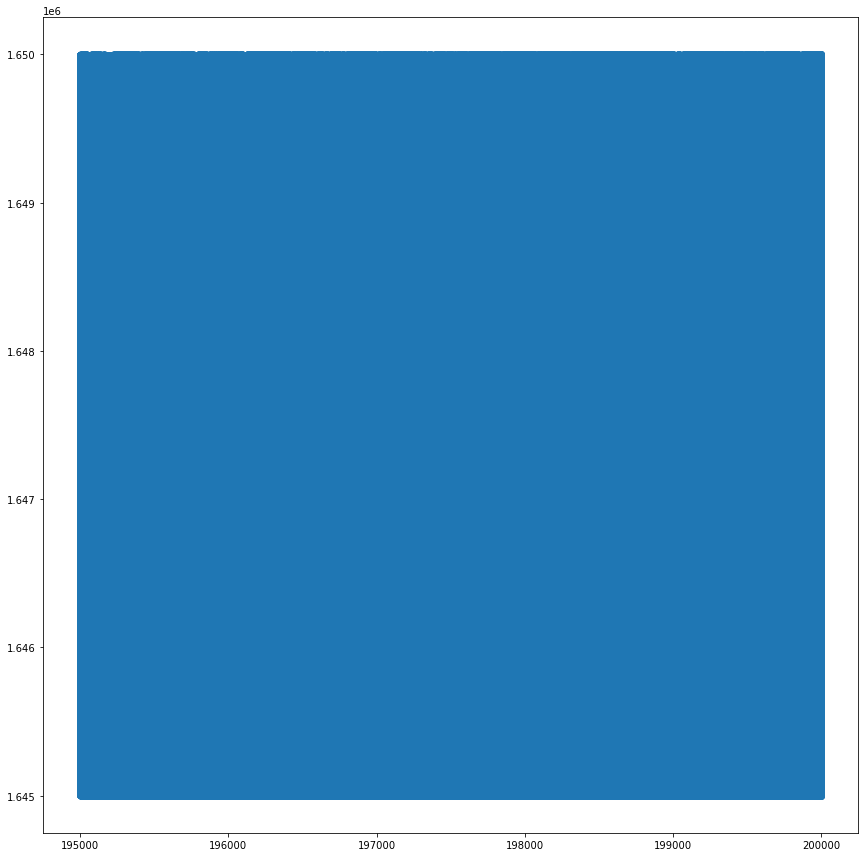

In [45]:
lidar_geodf.plot('intensity', figsize=(15,15));